In [69]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
def f(x):
    return 3*x**2 -4*x + 5

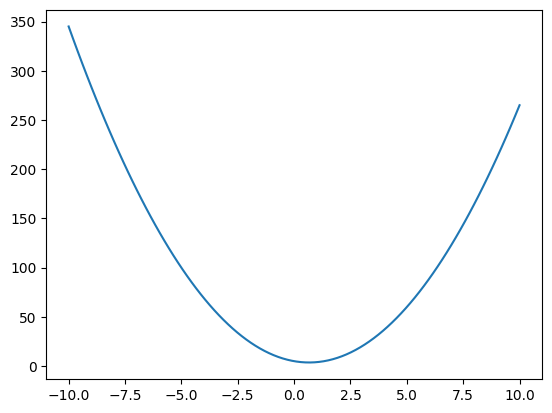

In [71]:
X = np.linspace(-10, 10, 100)
Y = f(X)
plt.plot(X, Y)

In [72]:
x = 1
h = 0.0001
(f(x + h) - f(x)) / h

2.0003000000023974

Exemple 2: cas concret pour un neurone

In [73]:
x = 2
w = -3
b = 1
y = w*x + b
print(y)

-5


In [74]:
y1 = y
y2 = w* (x +h) + b

print(f"y1 = {y1}")
print(f"y2 = {y2}")

y1 = -5
y2 = -5.000300000000001


In [75]:
print(f"slope: {(y2 - y1) / h}")

slope: -3.000000000010772


In [76]:
class Value():
    def __init__(self, data, _children = (), _op = "", label = "", grad = 0):
        self.data = data
        self.grad = grad
        self._prev = _children
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f"Value(data = {self.data})"
    
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), "+")
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), "*")

In [77]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [78]:
w = Value(2, label = 'w')
x = Value(3, label='x') 
b = Value(5, label='b')
wx = w * x; wx.label = "wx"
f_x = wx + b; f_x.label = "f_x"

f_x.grad = 1
b.grad = 1
x.grad = w.data
w.grad = x.data
wx.grad = 1

In [79]:
draw_dot(f_x)

w.data -= w.grad
b.data -= b.grad

In [80]:
print(w, b)

Value(data = -1) Value(data = 4)


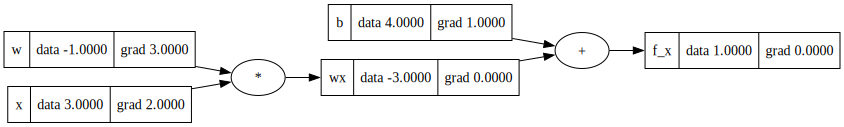

In [81]:
wx = w * x; wx.label = "wx"
f_x = wx + b; f_x.label = "f_x"
draw_dot(f_x)

In [82]:
def lol():
    w = Value(2, label = 'a')
    x = Value(3, label='b')
    b = Value(5, label='c')
    wx = w * x
    f_x = wx + b

    h= 0.0001

    w = Value(2, label = 'a')
    x = Value(3, label='b')
    b = Value(5, label='c')
    wx = w * x
    f_x_h = wx + b

    print(((f_x_h.data)- f_x.data)/h)


lol()

0.0


In [83]:
f_x.grad = 1
b.grad = 1
x = w.data
w = x.data

AttributeError: 'int' object has no attribute 'data'

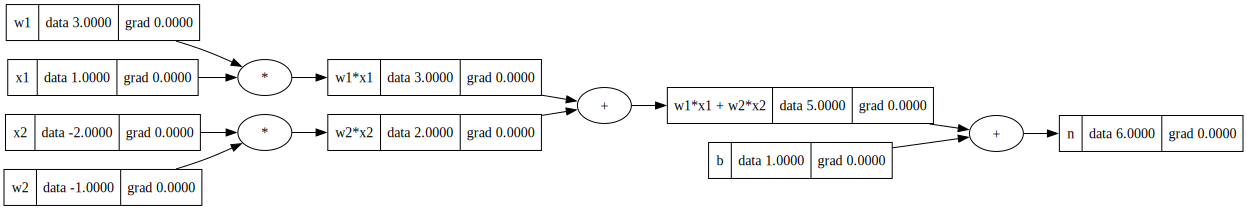

In [17]:
#input
x1 = Value(1, label='x1')
x2 = Value(-2, label='x2')

#weights
w1 = Value(3, label='w1')
w2 = Value(-1, label='w2')
b = Value(1, label='b')

w1x1 = w1 * x1; w1x1.label = 'w1*x1'
w2x2 = w2 * x2; w2x2.label = 'w2*x2'
w1x1_w2x2 = w1x1 + w2x2; w1x1_w2x2.label = 'w1*x1 + w2*x2'
n = w1x1_w2x2 + b; n.label = 'n'

draw_dot(n)

In [ ]:
n.grad = 1
b.grad = 1
w1x1_w2x2.grad = 1


n = w1x1_w2x2 + b

dn/db = db/db
dn/dw1x1_w2x2 = dw1x1_w2x2/dw1x1_w2x2 + db/dw1x1_w2x2 = dw1x1_w2x2/dw1x1_w2x2
dn/dw1x1 = dn/dw1x1_w2x2 * dw1x1_w2x2/dw1x1 = 1 * (dw1x1/dw1x1 + dw2x2/dw1x1) = 1 * (1 + 0) = 1
dn/dw2x2 = 1

dn/dw1 = dn/dw1x1_w2x2 * dw1x1_w2x2/dw1x1 * dw1x1/dw1 = 1 * 1 * 1 = 1
dn/dw2 = dn/dw1x1_w2x2 * dw1x1_w2x2/dw2x2 * dw2x2/dw2 = 1 * 1 * -2 = -2

W = W - dn/dw2
w = -2 - (-2)

In [18]:
class Value():
    def __init__(self, data, _children = (), _op = "", label = "", grad = 0):
        self.data = data
        self.grad = grad
        self._backward = lambda : None
        self._prev = _children
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f"Value(data = {self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")

        def _backward():
            self.grad = 1 * out.grad
            other.grad = 1 * out.grad

        out._backward = _backward
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")

        def _backward():
            self.grad = out.grad * other.data
            other.grad = out.grad * self.data
        
        out._backward = _backward
        return out

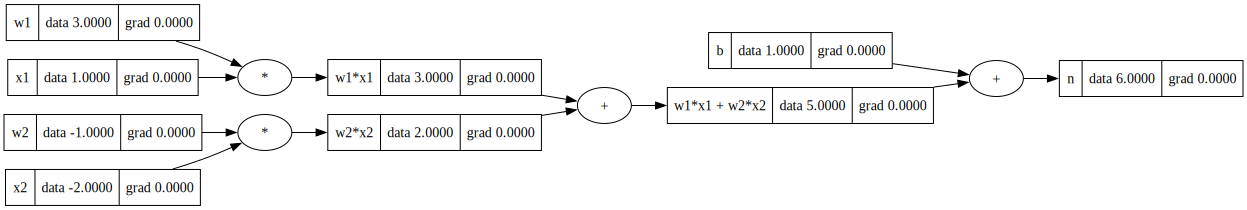

In [19]:
#input
x1 = Value(1, label='x1')
x2 = Value(-2, label='x2')

#weights
w1 = Value(3, label='w1')
w2 = Value(-1, label='w2')
b = Value(1, label='b')

w1x1 = w1 * x1; w1x1.label = 'w1*x1'
w2x2 = w2 * x2; w2x2.label = 'w2*x2'
w1x1_w2x2 = w1x1 + w2x2; w1x1_w2x2.label = 'w1*x1 + w2*x2'
n = w1x1_w2x2 + b; n.label = 'n'

draw_dot(n)

In [20]:
n.grad = 2

In [21]:
n._backward()

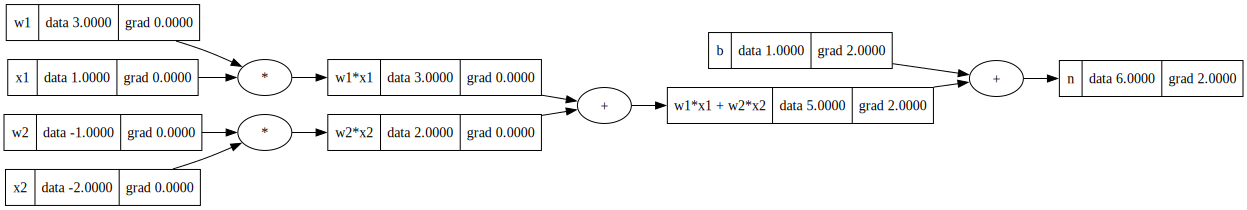

In [22]:
draw_dot(n)

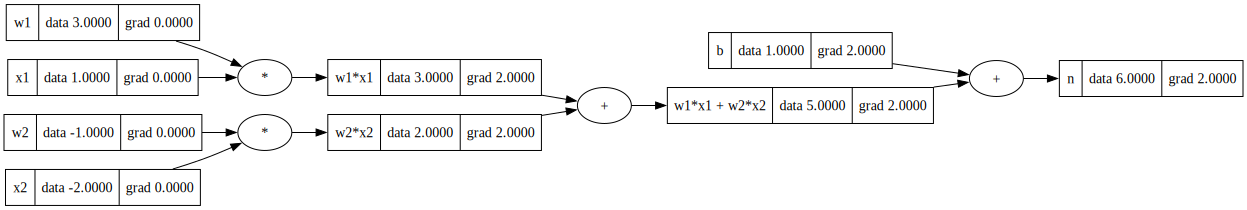

In [23]:
w1x1_w2x2._backward()
draw_dot(n)

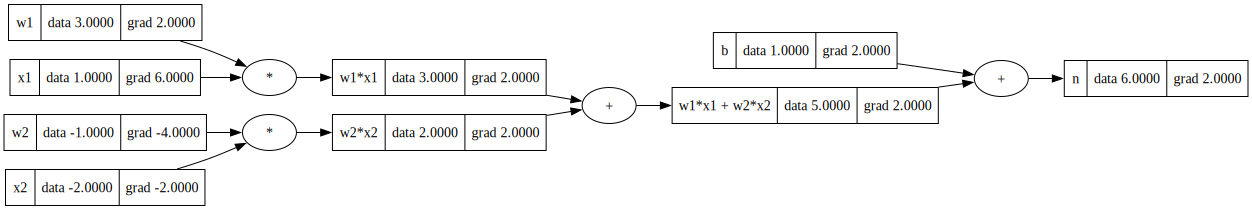

In [25]:
w1x1._backward()
w2x2._backward()
draw_dot(n)

In [51]:
class Value:
    def __init__(self, data, _children = (), _op = '', label = ''):
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = _children
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f'Value(data = {self.data})'

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad = 1 * out.grad
            other.grad = 1 * out.grad
        
        out._backward = _backward
        return out 
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad

        out._backward = _backward
        return out

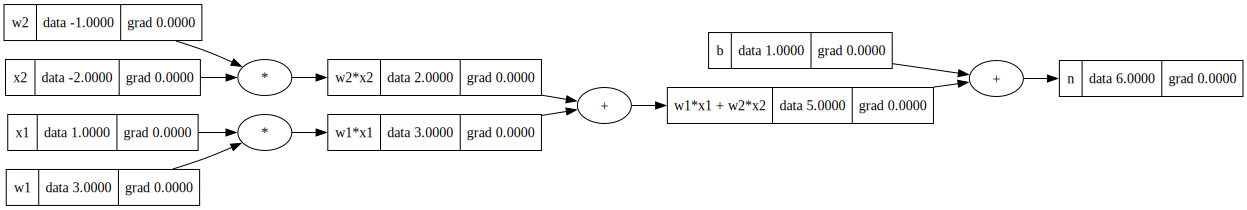

In [53]:
#input
x1 = Value(1, label='x1')
x2 = Value(-2, label='x2')

#weights
w1 = Value(3, label='w1')
w2 = Value(-1, label='w2')
b = Value(1, label='b')

w1x1 = w1 * x1; w1x1.label = 'w1*x1'
w2x2 = w2 * x2; w2x2.label = 'w2*x2'
w1x1_w2x2 = w1x1 + w2x2; w1x1_w2x2.label = 'w1*x1 + w2*x2'
n = w1x1_w2x2 + b; n.label = 'n'

draw_dot(n)

In [55]:
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(n)
topo

[Value(data = 3),
 Value(data = 1),
 Value(data = 3),
 Value(data = -1),
 Value(data = -2),
 Value(data = 2),
 Value(data = 5),
 Value(data = 1),
 Value(data = 6)]

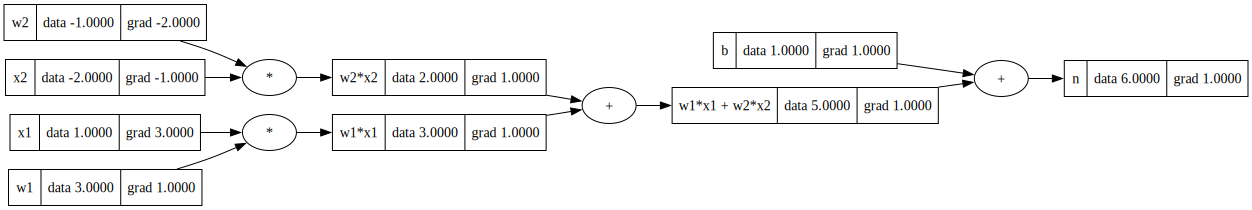

In [56]:
n.grad = 1
for node in reversed(topo):
    node._backward()
draw_dot(n)

In [70]:
class Value:
    def __init__(self, data, _children = (), _op = '', label = ''):
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = _children
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f'Value(data = {self.data})'

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad = 1 * out.grad
            other.grad = 1 * out.grad
        
        out._backward = _backward
        return out 
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad

        out._backward = _backward
        return out
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1
        for node in reversed(topo):
            node._backward()

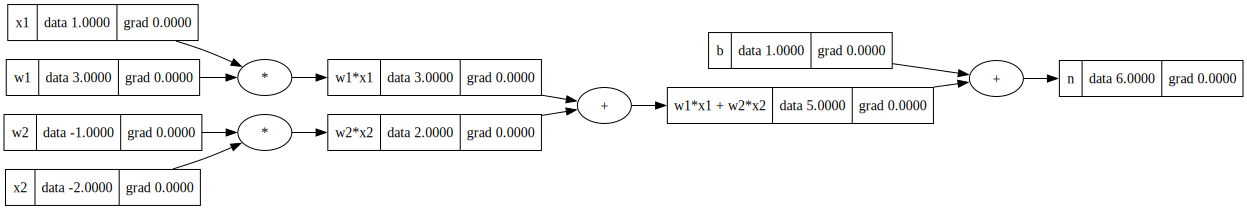

In [71]:
#input
x1 = Value(1, label='x1')
x2 = Value(-2, label='x2')

#weights
w1 = Value(3, label='w1')
w2 = Value(-1, label='w2')
b = Value(1, label='b')

w1x1 = w1 * x1; w1x1.label = 'w1*x1'
w2x2 = w2 * x2; w2x2.label = 'w2*x2'
w1x1_w2x2 = w1x1 + w2x2; w1x1_w2x2.label = 'w1*x1 + w2*x2'
n = w1x1_w2x2 + b; n.label = 'n'

draw_dot(n)

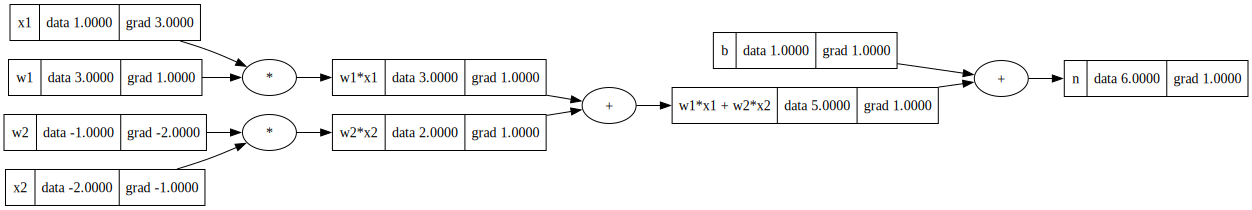

In [72]:
n.backward()
draw_dot(n)

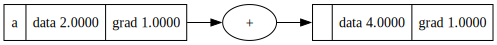

In [73]:
a = Value(2, label="a")
b = a + a
b.backward()
draw_dot(b)

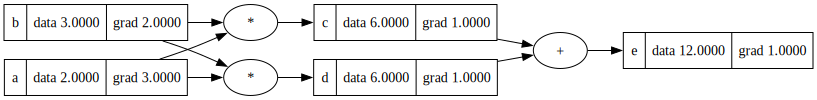

In [75]:
a = Value(2, label='a')
b = Value(3, label='b')
c = a * b; c.label = 'c'
d = a * b; d.label = 'd'
e = c + d; e.label = 'e'
e.backward()
draw_dot(e)

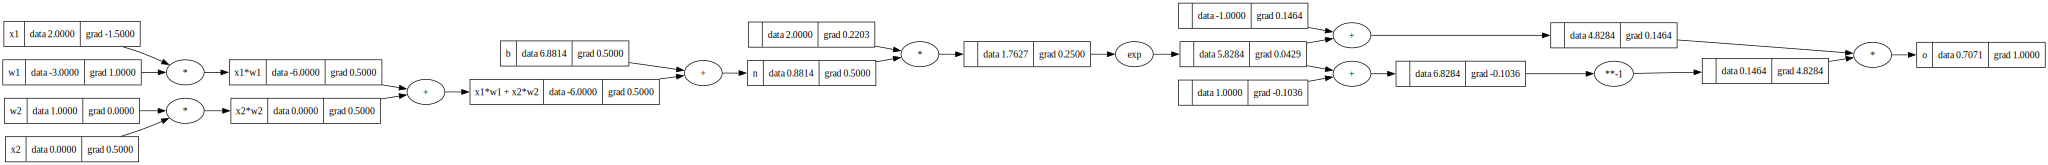

In [94]:
class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out
  
  def __rmul__(self, other): # other * self
    return self * other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)
  
  def __rsub__(self, other): # other - self
    return other + (-self)

  def __radd__(self, other): # other + self
    return self + other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out
  
  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')
    
    def _backward():
      self.grad += out.data * out.grad # NOTE: in the video I incorrectly used = instead of +=. Fixed here.
    out._backward = _backward
    
    return out
  
  
  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# ----
e = (2*n).exp()
o = (e - 1) / (e + 1)
# ----
o.label = 'o'
o.backward()
draw_dot(o)

In [95]:
import random

class Perceptron:

    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x):
        agg = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = agg.tanh()
        return out 
    
    def parameters(self):
        return self.w + [self.b]

In [96]:
class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Perceptron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [neuron(x) for neuron in self.neurons]
        return outs if len(outs)>1 else outs[0]  
    
    def parameters(self):
        return [p for perceptron in self.neurons for p in perceptron.parameters()]

In [97]:
X = [1, 2, 3]
layer = Layer(3, 5)
print(layer(X))

[Value(data=-0.9597410884165354), Value(data=-0.35458032033658277), Value(data=-0.8933856682090066), Value(data=0.8806028180716775), Value(data=0.9992992555795481)]


In [98]:
class MLP:
    def __init__(self, nin: int, nouts:list):
        size_layers = [nin] + nouts
        self.layers = [Layer(size_layers[i], size_layers[i+1]) for i in range(len(size_layers)-1)]
    
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        return [p for layers in self.layers for p in layers.parameters()]

In [109]:
x = [1, 2, 3]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=-0.2746052750381406)

In [110]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [111]:
for k in range(20):
    #Forward Pass

    ypred = [n(x) for x in xs]
    loss = sum((ygt - yout)**2 for ygt, yout in zip(ys, ypred))

    #backward pass
    for p in n.parameters():
        p.grad = 0
    loss.backward()

    #update
    for p in n.parameters():
        p.data -= 0.1 * p.grad

    print(k, loss.data)

0 5.564079664283664
1 3.896629946222084
2 4.88566430768157
3 3.5787824958743886
4 3.6556868857547964
5 1.0011272081730591
6 0.08701068109446528
7 0.07275226440040332
8 0.06361363787682364
9 0.05686445771293928
10 0.05152298787765068
11 0.04712946080862703
12 0.04342704592373916
13 0.0402540327893745
14 0.037500040555883754
15 0.03508546721658575
16 0.032950653928910195
17 0.031049616629698476
18 0.029346147585474
19 0.02781125167791606


In [112]:
ypred = [n(x) for x in xs]
ypred

[Value(data=0.9316516632677485),
 Value(data=-0.8953866315888266),
 Value(data=-0.9399778480050276),
 Value(data=0.9151278867327663)]